# Practice 8 - k-Means and Hierarchical Clustering

We will work again on the iris data set. The data have labels here, but we will check if unsupervised learning can make good guesses.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [2]:
dataset = pd.read_csv('iris.csv')

*This small dataset from 1936 is often used for testing out machine learning algorithms and visualizations. Each row of the table represents an iris flower, including its species and dimensions of its botanical parts, sepal and petal, in centimeters.*

In [3]:
dataset.sample(n=5)

,sepal_length,sepal_width,petal_length,petal_width,species
144,6.7,3.3,5.7,2.5,virginica
63,6.1,2.9,4.7,1.4,versicolor
148,6.2,3.4,5.4,2.3,virginica
9,4.9,3.1,1.5,0.1,setosa
105,7.6,3.0,6.6,2.1,virginica


# Your Task
You will use the two clustering algorithms you know on this dataset to see if it can group the iris specimen reasonably well.

## 1- Data Visualization
We will first information about the **sepal** of the iris to cluster them.
### Plot **sepal width** vs. **sepal length** in a scatter plot to see how your specimen are distributed on that 2D feature space.

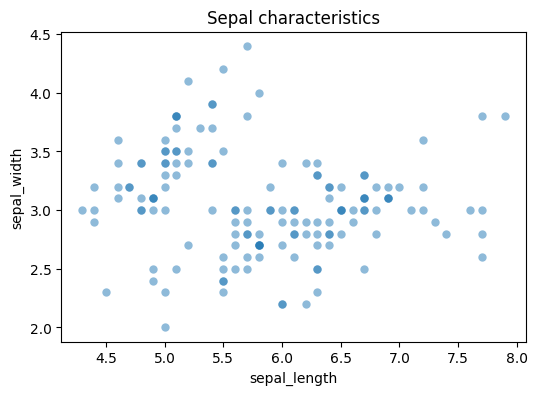

In [4]:
import matplotlib.pyplot as plt

# Define feature 1 and feature 2
feature_x = 'sepal_length'
feature_y = 'sepal_width'
 

fig = plt.figure(figsize=(6,6))
 

plt.scatter(dataset[feature_x], dataset[feature_y], alpha=0.5, lw=0)
 

# Figure style
plt.title('Sepal characteristics')
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.axis('scaled')
plt.show()

## 2- K-means
### Train a k-Means model for 3 clusters with these two features (sepal width, sepal length) and plot the results.  
Hints:  
- Don't forget feature scaling!
- For the plot: 
    - You can loop over your clusters and call the plt.scatter() method three times. 
    - When you plot a cluster, you can use the keyword argument color='...' to specify a color the points, and label='...' for the legend.
    - Call plt.legend() to display the legend
    - Label the axes
    - Give a title to your graph

In [19]:
X_sepal = dataset[[feature_x, feature_y]].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sepal)


kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

y_pred = kmeans.predict(X_scaled)

labels = kmeans.labels_



C:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


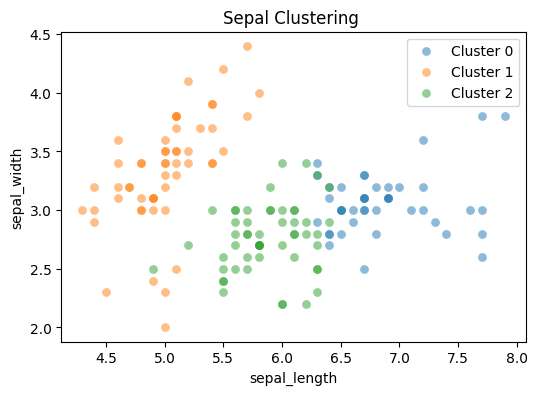

In [21]:
def plot_clusters(dataset, feature_x, feature_y, cluster_assignments):
    fig = plt.figure(figsize=(6,6))

 

    # Plot data points with color corresponding to their cluster attribution
    for i in range(3):
        plt.scatter(dataset[y_pred == i][feature_x], dataset[y_pred == i][feature_y], s = 40, alpha=0.5, lw=0, label='Cluster '+str(i))

 

    plt.title('Sepal Clustering ')
    plt.xlabel(feature_x)
    plt.ylabel(feature_y)
    plt.legend()
    plt.axis('scaled')

 

    plt.show()
    
plot_clusters(dataset, 'sepal_length', 'sepal_width', y_pred)

## 3- Hierarchical Clustering
You first need to choose which likage methode you want to use.  
You will first visualize the dendrogram (from scipy) with different likage methods to pick the one that seems most appropriate.  
You will then train an sklearn agglomerative clustering model with the linkage method you chose.
### 3a) Build at least 4 dendrograms, one with each linkage method we have seen. 

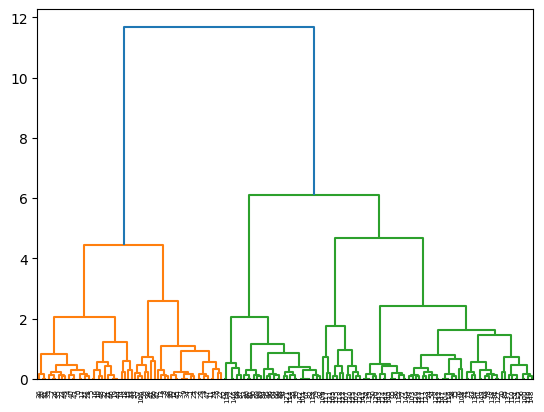

In [6]:
from scipy.cluster import hierarchy
dendrogram = hierarchy.dendrogram(hierarchy.linkage(X_sepal, method = 'ward'))

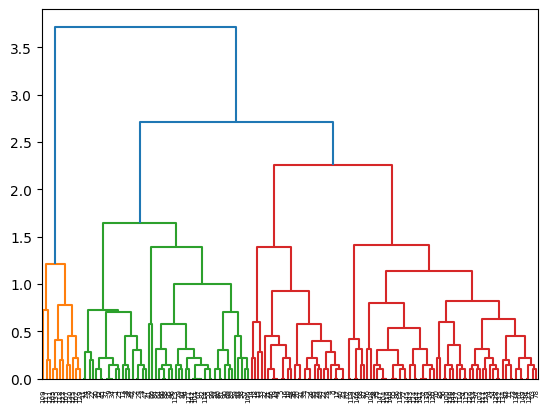

In [7]:
from scipy.cluster import hierarchy
dendrogram = hierarchy.dendrogram(hierarchy.linkage(X_sepal, method = 'complete'))

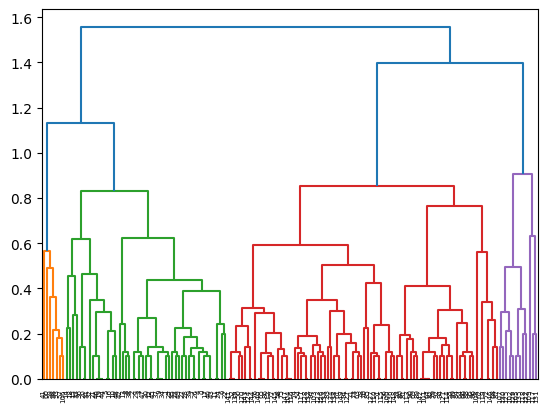

In [8]:
from scipy.cluster import hierarchy
dendrogram = hierarchy.dendrogram(hierarchy.linkage(X_sepal, method = 'average'))

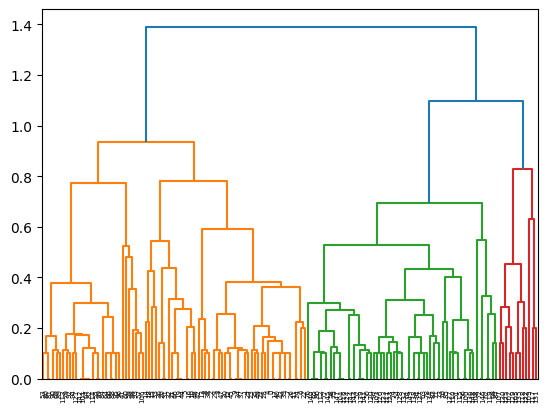

In [9]:
from scipy.cluster import hierarchy
dendrogram = hierarchy.dendrogram(hierarchy.linkage(X_sepal, method = 'centroid'))

### Comment and pick the linkage that seems the most appropriate. 

 i feel complete linkage looks like make more sense since it is categorized in the right way.

### 3b) Train an AgglomerativeClustering model for 3 clusters with the linkage you chose and plot the results.  

In [10]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters= 5, affinity = 'euclidean', linkage = 'average')

clusters = hc.fit_predict(X_sepal)
clusters

C:\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 4, 0, 0, 4, 3, 4, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 2, 4, 0, 0, 0, 4, 0, 0, 4, 0, 0, 0, 4, 4, 2,
       0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

## 4- Using different features
We will now see what your clustering looks like if we use different features: **petal width** vs. **petal length**

### 4a) Plot **petal width** vs. **petal length** in a scatter plot to see how your specimen are distributed on that 2D feature space.

Text(0, 0.5, 'petal_width')

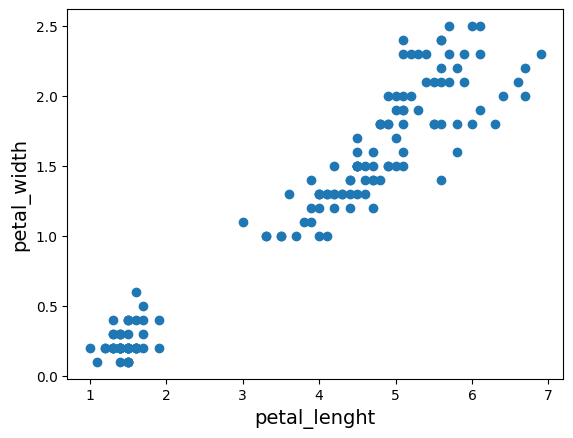

In [11]:
plt.scatter(dataset['petal_length'], dataset['petal_width'])
plt.xlabel('petal_lenght', size=14)
plt.ylabel('petal_width', size=14)

### 4b) Train a k-Means model for 3 clusters with these two features and plot the results.  

In [23]:
X_petal = dataset[['petal_length', 'petal_width']]

scaler = StandardScaler()
scaled_petal = scaler.fit_transform(X_petal)    
    
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_petal)


y_pred_petal = kmeans.predict(scaled_petal)
y_pred_petal

C:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

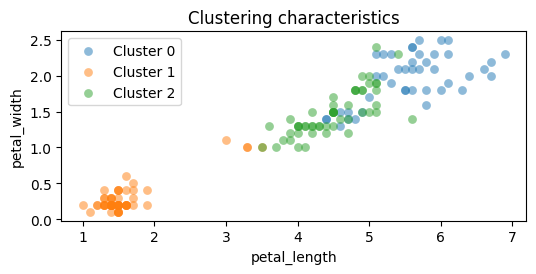

In [25]:
def plot_clusters(dataset, feature_x, feature_y, cluster_assignments):
    fig = plt.figure(figsize=(6,6))

 

    # Plot data points with color corresponding to their cluster attribution
    for i in range(3):
        plt.scatter(dataset[y_pred == i][feature_x], dataset[y_pred == i][feature_y], s = 40, alpha=0.5, lw=0, label='Cluster '+str(i))

 

    plt.title('Clustering characteristics')
    plt.xlabel(feature_x)
    plt.ylabel(feature_y)
    plt.legend()
    plt.axis('scaled')

 

    plt.show()
    
plot_clusters(dataset, 'petal_length', 'petal_width', clusters)

## 5- Compare the two sets of features: sepals vs petal
Your friend is a florist and challenges you to tell her if irises are easier to distinguish by looking at their petals or their sepals. You think you can answer by looking at the data!
### Visually, which 2D plane seems to be the most convenient for clustering? Explain  
You can reproduce side by side the two plots you generated from the k-means clusterings of question 2 and 4b in order to compare.

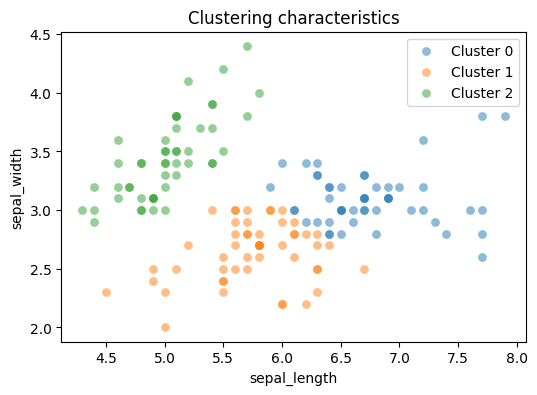

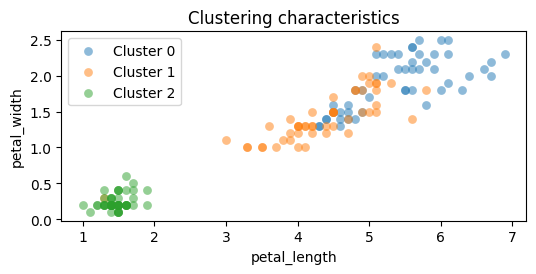

In [15]:
def plot_clusters(dataset, feature_x, feature_y, cluster_assignments):
    fig = plt.figure(figsize=(6,6))

 

    # Plot data points with color corresponding to their cluster attribution
    for i in range(3):
        plt.scatter(dataset[y_pred == i][feature_x], dataset[y_pred == i][feature_y], s = 40, alpha=0.5, lw=0, label='Cluster '+str(i))

 

    plt.title('Clustering characteristics')
    plt.xlabel(feature_x)
    plt.ylabel(feature_y)
    plt.legend()
    plt.axis('scaled')

 

    plt.show()
    
plot_clusters(dataset, 'sepal_length', 'sepal_width', clusters)

def plot_clusters(dataset, feature_x, feature_y, cluster_assignments):
    fig = plt.figure(figsize=(6,6))

 

    # Plot data points with color corresponding to their cluster attribution
    for i in range(3):
        plt.scatter(dataset[y_pred == i][feature_x], dataset[y_pred == i][feature_y], s = 40, alpha=0.5, lw=0, label='Cluster '+str(i))

 

    plt.title('Clustering characteristics')
    plt.xlabel(feature_x)
    plt.ylabel(feature_y)
    plt.legend()
    plt.axis('scaled')

 

    plt.show()
    
plot_clusters(dataset, 'petal_length', 'petal_width', clusters)

# Based on the above observations, i feel petal has the better clustering

## BONUS: 4D clustering
Train a clustering model with all 4 features and see if the clusters change!  
Hint: If you want to plot your result, you will obviously have to select 2 feature among the 4 to construct the feature plane of you plot.

C:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


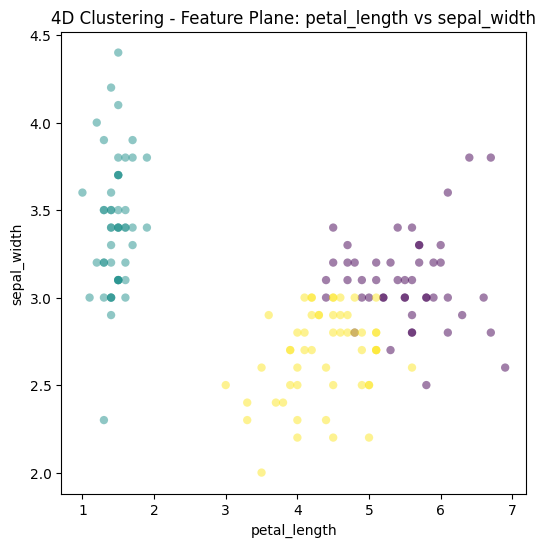

In [17]:

X = dataset[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

y_pred = kmeans.predict(X_scaled)

feature_x = 'petal_length'
feature_y = 'sepal_width'

plt.figure(figsize=(6, 6))
plt.scatter(dataset[feature_x], dataset[feature_y], c=y_pred, cmap='viridis', alpha=0.5, lw=0)
plt.title('4D Clustering - Feature Plane: {} vs {}'.format(feature_x, feature_y))
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.show()
